In [13]:
import sys
import snap
import numpy as np

import matplotlib.pyplot as plt

# 1. Introduction SNAP

Stanford Network Analysis Platform [site](http://snap.stanford.edu/) , in Python and C++ (core in C++).
In short Numpy for graph.

#### install 
pip install snap-stanford

## 1.1 Types

#### Naming conventions

To make sure the type we use has corresponding in C++.

* Int, Flt, Str
* T- for class type, P- for graph object
* V- for vector, VV- for vector of vector i.e. matrix, H- for hash table, HH- a hash of hashes, Pr- for pair.
* Get- , Set-, I- iterator, Nbr neighbor, Deg degree, Src source, Dst destination, N- node, E- edge.

### Vector

e.g. TIntV for vector (has fcns Add(), Len(), for item in V, etc)

In [12]:
v = snap.TIntV()

v.Add(1); v.Add(2); v.Add(3);

print("the length of the vector is : ", v.Len())
for item in v :
    print(item)

the length of the vector is :  3
1
2
3


### Hash Tables : KeyID

T key_type value_type H

### Pair Types

* a pair of (value1, value2)
* Tt type1 type2 Pr, e.g. TIntStrPr (GetVal1(), GetVal2())

In [8]:
p = snap.TIntStrPr(1, "one")
print(p.GetVal1(), p.GetVal2())

1 one


## 1.2 Graph

Graph, network classes
* TUNGraph/PUNGraph : undirected graph
* TNGraph/PNGraph : directed graph
* TNEANet/PNEANet : multigraph with attributes on nodes and edges.

In [11]:
G1 = snap.TNGraph.New()

# firt add the nodes before add the edges
G1.AddNode(1); G1.AddNode(5); G1.AddNode(12);

G1.AddEdge(1,5); G1.AddEdge(5,1); G1.AddEdge(5,12);

G2 = snap.TUNGraph.New()

In [13]:
for NI in G1.Nodes():
    print("node id", NI.GetId(), " out degree ", NI.GetOutDeg(), " in-degree ", NI.GetInDeg())

node id 1  out degree  1  in-degree  1
node id 5  out degree  2  in-degree  1
node id 12  out degree  0  in-degree  1


In [28]:
PRankH = snap.TIntFltH()
snap.GetPageRank(G1,PRankH)

for item in PRankH:
    print(item, PRankH[item])

1 0.3031854764501264
5 0.3936290470997472
12 0.3031854764501264


Save/Load txt:
* save : SaveEdgeList(G4, "text.txt", "List of edges")
* load : LoadEdgeList(snap.PNGraph, "text.txt", 0, 1). 0, 1 : the position of the wanted edge indices.

Save/Load binary (much faster):
* FOut = snap.TFOut("test.graph"); G2.Save(FOut); Fout.Flush()
* Fin = snap.TFIn("test.graph"); G4 = snap.TNGraph.Load(FIn


## 1.3 Plotting

* Gnuplot / graphviz / Matplotlib : quick but for only small networks


In [5]:
java_data_path = "stackoverflow-Java.txt"
G_java = snap.LoadEdgeList(snap.PNGraph, java_data_path, 0, 1)

snap.PlotInDegDistr(G_java, "Stack-Java", "Stack-Java In Degree")

In [3]:
snap.PrintInfo(G_java, "Stack-Java", "Stack-Java-info.txt", False)

In [ ]:
  Stack-Java: Directed
  Nodes:                    146874
  Edges:                    333606
  Zero Deg Nodes:           0
  Zero InDeg Nodes:         83443
  Zero OutDeg Nodes:        30963
  NonZero In-Out Deg Nodes: 32468
  Unique directed edges:    333606
  Unique undirected edges:  333481
  Self Edges:               20600
  BiDir Edges:              20850
  Closed triangles:         41389
  Open triangles:           51597174
  Frac. of closed triads:   0.000802
  Connected component size: 0.893201
  Strong conn. comp. size:  0.029433
  Approx. full diameter:    13
  90% effective diameter:  5.720483

In [4]:
GPA = snap.GenPrefAttach(30,3,snap.TRnd())

# 2. Google Cloud

Google cloud for higher education


# 3. HW0

## 3.1 Analyzing the Wikipedia voters network

In [6]:
wiki_data_path = "Wiki-Vote.txt"
G_wiki = snap.LoadEdgeList(snap.PNGraph, wiki_data_path, 0, 1)

In [27]:
num_nodes = snap.CntNonZNodes(G_wiki) + snap.CntDegNodes(G_wiki, 0)
print("The network has", num_nodes, "nodes.")
print("The network has", snap.CntSelfEdges(G_wiki),"self-loops.")

The network has 7115 nodes.
The network has 0 self-loops.


In [25]:
Count = snap.CntNonZNodes(G_wiki)
print("Directed Graph: Count of nodes with degree greater than 0 is %d" % Count)

Directed Graph: Count of nodes with degree greater than 0 is 7115


In [19]:
Count_dir= snap.CntUniqDirEdges(G_wiki)
print("Directed Graph: Count of unique directed edges is %d" % Count_dir)
Count_undir = snap.CntUniqUndirEdges(G_wiki)
print("Directed Graph: Count of unique undirected edges is %d" % Count_undir)
print("Directed Graph: The number of reciprocated edges in the network is %d" % (Count_dir-Count_undir))

Directed Graph: Count of unique directed edges is 103689
Directed Graph: Count of unique undirected edges is 100762
Directed Graph: The number of reciprocated edges in the network is 2927


In [22]:
Count_in = snap.CntInDegNodes(G_wiki, 0)
print("Directed Graph: Count of nodes with in-degree 0 is %d" % Count_in)
Count_out = snap.CntOutDegNodes(G_wiki, 0)
print("Directed Graph: Count of nodes with out-degree 0 is %d" % Count_out)

Directed Graph: Count of nodes with in-degree 0 is 4734
Directed Graph: Count of nodes with out-degree 0 is 1005


In [30]:
Count_in_l10 = 0
Count_out_l10 = 0
for i in range(10):
    Count_in = snap.CntInDegNodes(G_wiki, i)
    Count_out = snap.CntOutDegNodes(G_wiki, i)
    Count_in_l10 += Count_in
    Count_out_l10 += Count_out
print("Directed Graph: Count of nodes with in-degree less than 10 is %d" % Count_in_l10)
print("Directed Graph: Count of nodes with out-degree less than 10 is %d" % Count_out_l10)
print("Directed Graph: Count of nodes with out-degree no less than 10 is %d" % (num_nodes-Count_out_l10))

Directed Graph: Count of nodes with in-degree less than 10 is 5165
Directed Graph: Count of nodes with out-degree less than 10 is 5424
Directed Graph: Count of nodes with out-degree no less than 10 is 1691


## 3.2 Further Analyzing the Wikipedia voters network

In [31]:
snap.PrintInfo(G_wiki, "wiki", "wiki-info.txt", False)

In [61]:
head_name = "wiki"
snap.PlotInDegDistr(G_wiki, head_name, "wiki In Degree")
indegree = np.loadtxt("inDeg."+head_name+".tab")
snap.PlotOutDegDistr(G_wiki, head_name, "wiki Out Degree")
outdegree = np.loadtxt("outDeg."+head_name+".tab")

In [62]:
# filter zero entities
filtered = outdegree[:,1] > 0 
outdegree = outdegree[filtered, :]

# filter zero entities
filtered = indegree[:,1] > 0 
indegree = indegree[filtered, :]

In [82]:
z = np.polyfit(np.log10(outdegree[1:,0]), np.log10(outdegree[1:,1]), 1)
a = z[0]; b = z[1];

In [87]:
estimated_degree = np.power(10,b)*np.power(outdegree[1:,0], a)

Text(0.5, 1.0, 'Log-Log plot of the in-degree')

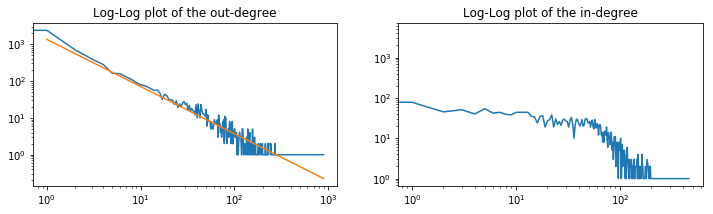

In [89]:
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.loglog(outdegree[:,0], outdegree[:,1])
plt.loglog(outdegree[1:,0], estimated_degree)
plt.title("Log-Log plot of the out-degree")
plt.subplot(122)
plt.loglog(indegree[:,0], indegree[:,1])
plt.title("Log-Log plot of the in-degree")

## 3.3 Finding Experts on the Java Programming Language on StackOverow

In [90]:
java_data_path = "stackoverflow-Java.txt"
G_java = snap.LoadEdgeList(snap.PNGraph, java_data_path, 0, 1)

In [95]:
Components = snap.TCnComV()
snap.GetWccs(G_java, Components)
print("Number of weakly connected component: %d" % Components.Len())

Number of weakly connected component: 10143


In [101]:
MxWcc = snap.GetMxWcc(G_java)
num_edges = 0
num_nodes = 0
for EI in MxWcc.Edges():
    num_edges += 1
for EI in MxWcc.Nodes():
    num_nodes += 1
print(num_edges,  "edges and",num_nodes, "nodes inthe largest weakly connected component.")

322486 edges and 131188 nodes inthe largest weakly connected component.


In [103]:
PRankH = snap.TIntFltH()
snap.GetPageRank(G_java, PRankH)
i_count = 0
for item in PRankH:
    i_count += 1
    if(i_count > 3):
        break
    print(item, PRankH[item])

78 2.4082266411394174e-06
86 1.0954090787330643e-05
58 2.7410854878087346e-06


In [ ]:
NIdHubH = snap.TIntFltH()
NIdAuthH = snap.TIntFltH()
snap.GetHits(G_java, NIdHubH, NIdAuthH)
i_count = 0
for item in NIdHubH
    print(item, NIdHubH[item])
for item in NIdAuthH:
    print(item, NIdAuthH[item])